# Veri Bilimi Dönem Projesi


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve,recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
filterwarnings('ignore')

# Keşifçi Veri Analizi

Veri setimizi yükleyelim ve df değişkenimize atayalım.

In [2]:
df=pd.read_csv("../input/tablett/tablet.csv")

İlk beş gözlem.

In [3]:
df.head(5)

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


Veri setimizin kaç gözlem ve öznitelikten oluştuğu.

In [4]:
df.shape

(2000, 20)

Veri setindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımı.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

In [6]:
df["FiyatAraligi"].value_counts()

Normal      500
Pahalı      500
Ucuz        500
Çok Ucuz    500
Name: FiyatAraligi, dtype: int64

countplot grafiğiyle FiyatAraligi parametresini görselleştirme

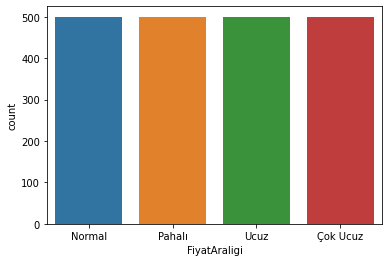

In [7]:
sns.countplot(x="FiyatAraligi", data=df);

Korelasyon matrisi

In [8]:
corr=df.corr()
corr
# Korelasyon, olasılık kuramı ve istatistikte iki rassal değişken arasındaki doğrusal ilişkinin
# yönünü ve gücünü belirtir.
# Korelasyon katsayısı, bağımsız değişkenler arasındaki ilişkinin yönü ve büyüklüğünü belirten  katsayıdır. 
# Bu katsayı, (-1) ile (+1) arasında bir değer alır.Korelasyon katsayısının 0'a yaklaşması değişkenler
# arasında zayıf ilişkinin olduğunu gösterir.Değişkenler birlikte artıyor ve azalıyorsa pozitif yönde
# değişkenlerden biri artarken diğeri azalıyorsa negatif yönde bir ilişki vardır.
# Değerlere bakıldığında en güçlü ilişki OnKameraMP ile ArkaKameraMP değişkenleri arasındadır.

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,1.000000,0.011482,0.032167,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000883,0.052510
MikroislemciHizi,0.011482,1.000000,-0.000172,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003969,-0.011432
OnKameraMP,0.032167,-0.000172,1.000000,-0.028642,-0.001723,0.024585,-0.013721,0.645697,-0.010662,-0.005646,0.012528,-0.007121
DahiliBellek,-0.004004,0.006545,-0.028642,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032883,-0.002790
Kalinlik,0.034085,-0.014364,-0.001723,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.007293,0.017003
Agirlik,0.001844,0.012350,0.024585,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002536,0.006209
CekirdekSayisi,-0.029727,-0.005724,-0.013721,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.005576,0.013148
ArkaKameraMP,0.031441,-0.005245,0.645697,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.029540,0.014657
CozunurlukYükseklik,0.014901,-0.014523,-0.010662,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.023421,-0.010645
CozunurlukGenislik,-0.008402,-0.009476,-0.005646,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.002101,0.006720


Veri setimizdeki sayısal değerler için temel istatistik değerleri

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


**Standart sapma ile verilerin ne kadar ortalamaya yakın olduğunu buluruz.Eğer standart sapma küçükse veriler ortalamaya yakın yerlerde dağılmışlardır.Standart sapma büyükse veriler ortalamadan uzak yerlere dağılmışlardır.Standart sapması en küçük olan değişkenimiz Kalinlik değişkeni verileri en düzgün dağılmış değişkenimizdir.
Standart sapma ortalamaya göre düşükse verilerin ayırt ediciliği düşüktür ve grup homojendir.Standart sapma, ortalamaya göre yüksekse grup heterojen ve verilerin ayırt ediciliği yüksektir.OnKameraMP heterojen diğer değişkenler ise homojendir.**

Kovaryans matrisi.

In [10]:
df.cov()

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,193088.359838,4.116922,61.358674,-31.923572,4.319702,28.689738,-29.885322,83.782186,2905.736870,-1595.644609,-4.201834e+02,126.075334
MikroislemciHizi,4.116922,0.665863,-0.000610,0.096914,-0.003381,0.356738,-0.010686,-0.025955,-5.259133,-3.341841,3.508705e+00,-0.050970
OnKameraMP,61.358674,-0.000610,18.853786,-2.257164,-0.002159,3.776743,-0.136295,16.992930,-20.563638,-10.606717,5.881467e+01,-0.168940
DahiliBellek,-31.923572,0.096914,-2.257164,329.266971,0.036037,-21.977567,-1.175291,-3.661448,84.080518,-65.366654,6.464887e+02,-0.276650
Kalinlik,4.319702,-0.003381,-0.002159,0.036037,0.083184,0.222125,-0.002312,0.045969,3.233478,2.937617,-2.275414e+00,0.026794
Agirlik,28.689738,0.356738,3.776743,-21.977567,0.222125,1253.135567,-1.537873,4.045314,14.756486,1.373327,-9.730043e+01,1.200861
CekirdekSayisi,-29.885322,-0.010686,-0.136295,-1.175291,-0.002312,-1.537873,5.234197,-0.016547,-6.977203,24.205785,1.380876e+01,0.164357
ArkaKameraMP,83.782186,-0.025955,16.992930,-3.661448,0.045969,4.045314,-0.016547,36.775916,-49.694829,10.997543,1.939416e+02,0.485661
CozunurlukYükseklik,2905.736870,-5.259133,-20.563638,84.080518,3.233478,14.756486,-6.977203,-49.694829,196941.408040,97946.365509,-1.123601e+04,-25.812594
CozunurlukGenislik,-1595.644609,-3.341841,-10.606717,-65.366654,2.937617,1.373327,24.205785,10.997543,97946.365509,186796.361941,9.821991e+02,15.869264


Sayısal değişkenlerin dağılımı.

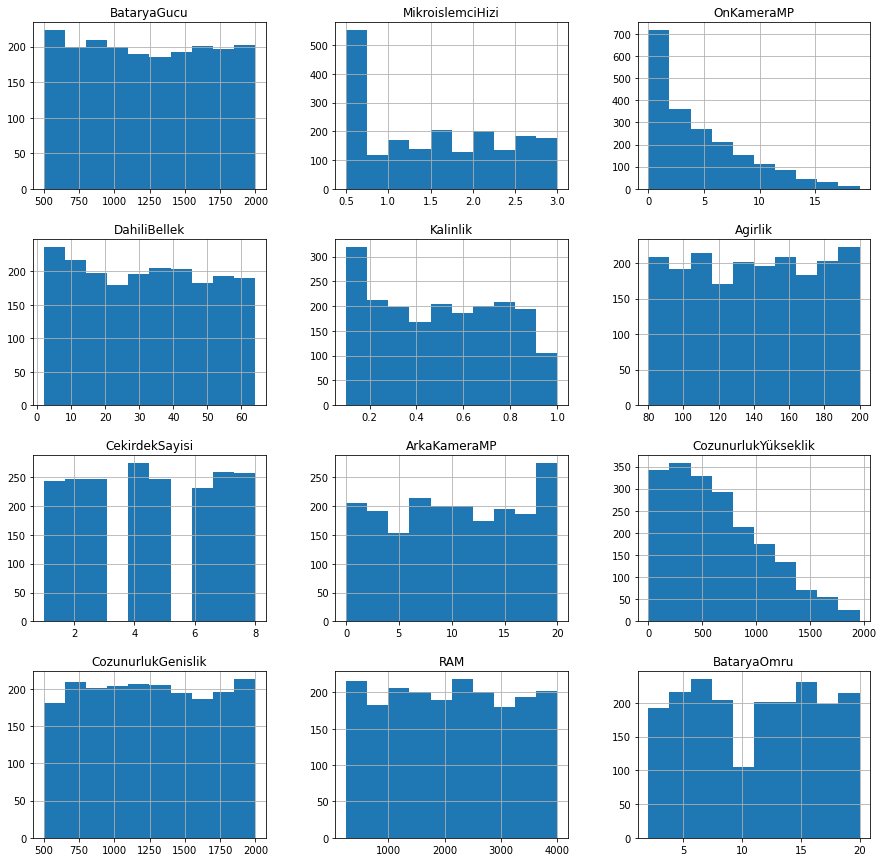

In [11]:
df.hist(figsize=(15,15));
plt.show()

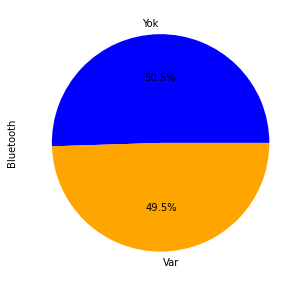

In [12]:
plt.figure(figsize=(5,5))
colors=["blue","orange"]
df.Bluetooth.value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
plt.show()

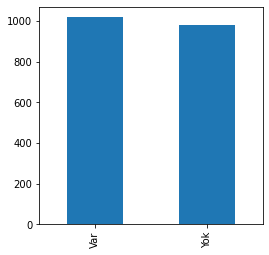

In [13]:
plt.figure (figsize=(4,4))
df.CiftHat.value_counts().plot.bar()
plt.show()

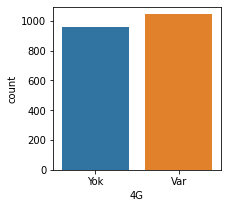

In [14]:
plt.figure (figsize=(3,3))
sns.countplot(x="4G",data=df);
plt.show()

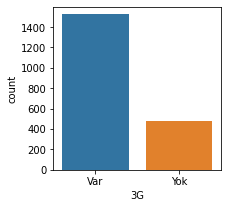

In [15]:
plt.figure (figsize=(3,3))
sns.countplot(x="3G",data=df);
plt.show()

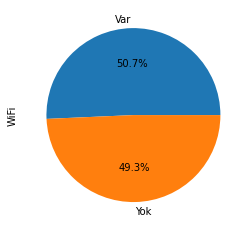

In [16]:
plt.figure (figsize=(4,4))
df.WiFi.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

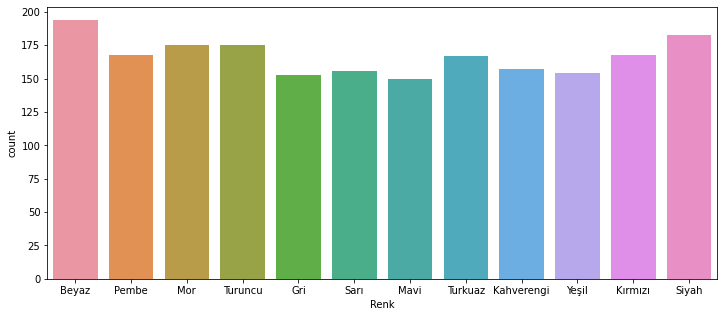

In [17]:
plt.figure (figsize=(12,5))
sns.countplot(x="Renk",data=df);
plt.show()

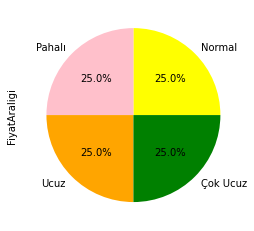

In [18]:
plt.figure(figsize=(4,4))
colors=["yellow","pink","orange","green"]
df.FiyatAraligi.value_counts().plot.pie(autopct='%1.1f%%',colors=colors)
plt.show()

# Veri Ön İşleme

Kaç adet eksik değer olduğunu gözlemleyelim.

In [19]:
df.isna().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

Değişkenlerdeki Null değerler yerine ortalama değerler yazdıralım.Daha sonra Null değerler kalmış mı
kontrol edelim.

In [20]:
eksik_OnKameraMP=df[df["OnKameraMP"].isnull()].index
eksik_OnKameraMP

Int64Index([351, 726, 792, 1416, 1641], dtype='int64')

In [21]:
df.loc[eksik_OnKameraMP,"OnKameraMP"]=4.312281

In [22]:
eksik_RAM = df[df["RAM"].isnull()].index
eksik_RAM

Int64Index([87, 169, 310, 329, 658, 777, 871, 961, 965, 1180, 1779, 1804], dtype='int64')

In [23]:
df.loc[eksik_RAM,"RAM"]=2116.243964

In [24]:
df.isna().sum()

BataryaGucu            0
Bluetooth              0
MikroislemciHizi       0
CiftHat                0
OnKameraMP             0
4G                     0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
3G                     0
Dokunmatik             0
WiFi                   0
FiyatAraligi           0
Renk                   0
dtype: int64

 "var" ve "yok" ibarelerini bilgisayarın anlayabileceği şekilde 0 ve 1'lere dönüştürme.

In [25]:
label_encoder = preprocessing.LabelEncoder()
# Öncelikle kütüphanemizi çağırıyoruz.

In [26]:
df['Bluetooth'] = label_encoder.fit_transform(df['Bluetooth'])
df.head() #yok=1 var=0

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,0,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,1,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,1,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,1,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [27]:
df['CiftHat'] = label_encoder.fit_transform(df['CiftHat'])
df.head()  #yok=1,var=0

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,0,2.8,0,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,1,1.3,0,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,1,0.5,0,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,1,1.0,1,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [28]:
df['3G'] = label_encoder.fit_transform(df['3G'])
df.head() #yok=1 , var=0

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,0,Yok,Yok,Normal,Beyaz
1,1046,0,2.8,0,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,0,Var,Var,Pahalı,Pembe
2,843,1,1.3,0,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,1,Yok,Var,Ucuz,Mor
3,894,1,0.5,0,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,0,Yok,Var,Pahalı,Turuncu
4,936,1,1.0,1,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,0,Var,Var,Normal,Beyaz


In [29]:
df['Dokunmatik'] = label_encoder.fit_transform(df['Dokunmatik'])
df.head() #yok=1 #var=0

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,0,1,Yok,Normal,Beyaz
1,1046,0,2.8,0,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,0,0,Var,Pahalı,Pembe
2,843,1,1.3,0,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,1,1,Var,Ucuz,Mor
3,894,1,0.5,0,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,Var,Pahalı,Turuncu
4,936,1,1.0,1,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,Var,Normal,Beyaz


In [30]:
df['WiFi'] = label_encoder.fit_transform(df['WiFi'])
df.head() #yok=1 , var=0

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,0,1,1,Normal,Beyaz
1,1046,0,2.8,0,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,0,0,0,Pahalı,Pembe
2,843,1,1.3,0,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,1,1,0,Ucuz,Mor
3,894,1,0.5,0,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,0,Pahalı,Turuncu
4,936,1,1.0,1,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,0,Normal,Beyaz


In [31]:
df['4G'] = label_encoder.fit_transform(df['4G'])
df.head() #yok=1 , var=0

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,1,1,Normal,Beyaz
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,0,0,Pahalı,Pembe
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,1,0,Ucuz,Mor
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,0,Pahalı,Turuncu
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,0,Normal,Beyaz


Renk değişkenimiz ordinal olmadığı için get_dummies yardımıyla kategorik öznitelik çıkarımında bulunma.

In [32]:
df['Renk']=pd.Categorical(df['Renk'])
dfDummies=pd.get_dummies(df['Renk'],prefix='Renk')
dfDummies

,Renk_Beyaz,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,1,0,0,0
1996,0,0,0,0,0,0,0,1,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,1,0
1998,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
df=pd.concat([df,dfDummies],axis=1)
df.head(10)

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,1,1.3,0,1.0,1,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,1,0.5,0,1.0,0,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,1,1.0,1,1.0,1,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0
5,1162,1,1.0,1,0.0,1,50,0.5,104,4,...,0,0,0,0,0,0,0,0,0,0
6,1849,0,0.5,1,1.0,1,29,0.5,181,7,...,0,0,0,0,0,0,0,0,0,0
7,1860,1,0.5,0,2.0,0,55,0.7,83,6,...,0,0,0,0,0,0,0,0,0,0
8,1536,1,0.8,1,12.0,1,13,0.3,105,7,...,0,0,0,0,0,1,0,0,0,0
9,539,0,0.6,0,9.0,1,21,0.1,145,7,...,0,0,1,0,0,0,0,0,0,0


In [34]:
df.drop(['Renk','Renk_Mavi'],axis=1,inplace=True)


In [35]:
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,1,1.3,0,1.0,1,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,1,0.5,0,1.0,0,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,1,1.0,1,1.0,1,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0


# Regresyon Analizi

Veri setimizi bağımlı ve bağımsız değişkenler olmak üzere bölme


In [36]:
y=df["FiyatAraligi"] 
x=df.drop("FiyatAraligi",axis=1)
#y bağımlı değişkenimiz
#x bağımsız değişkenimiz

In [37]:
y

0         Normal
1         Pahalı
2           Ucuz
3         Pahalı
4         Normal
          ...   
1995    Çok Ucuz
1996        Ucuz
1997      Pahalı
1998      Normal
1999      Normal
Name: FiyatAraligi, Length: 2000, dtype: object

In [38]:
x

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,1,1.3,0,1.0,1,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,1,0.5,0,1.0,0,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,1,1.0,1,1.0,1,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,1,2.9,0,3.0,0,7,0.8,147,2,...,0,0,0,0,0,0,1,0,0,0
1996,1654,1,1.8,1,1.0,1,11,0.3,146,7,...,0,0,0,0,0,1,0,0,0,0
1997,742,1,2.2,0,4.0,1,56,0.2,190,7,...,0,0,0,0,0,0,0,0,1,0
1998,704,1,2.2,0,4.0,1,53,0.2,186,6,...,0,0,0,0,0,0,0,1,0,0


Bağımlı ve bağımsız değişkenleri  test olmak üzere train_test_split metodunu kullanarak ayıralım.

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

4 parça değişkeni kontrol edelim.

In [40]:
x_test

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
1860,1433,0,2.3,1,2.0,0,5,0.1,129,5,...,0,0,0,0,0,0,0,0,0,0
353,1174,0,0.9,1,7.0,1,30,1.0,147,4,...,0,0,0,0,0,0,1,0,0,0
1333,999,1,2.6,0,11.0,0,56,1.0,165,4,...,0,0,0,0,1,0,0,0,0,0
905,972,0,0.5,0,5.0,1,13,0.4,193,5,...,0,0,0,0,0,0,0,1,0,0
1289,1811,0,2.5,1,4.0,0,5,0.6,98,4,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,1530,1,2.0,1,11.0,1,42,0.8,177,6,...,0,0,0,1,0,0,0,0,0,0
1356,668,1,2.3,1,2.0,0,48,0.3,114,1,...,0,0,0,0,0,0,0,1,0,0
408,1179,0,0.8,1,1.0,1,5,0.9,154,5,...,0,0,1,0,0,0,0,0,0,0
1614,1456,1,1.6,0,9.0,0,39,0.1,80,8,...,0,0,1,0,0,0,0,0,0,0


In [41]:
y_test

1860        Ucuz
353     Çok Ucuz
1333      Normal
905         Ucuz
1289      Normal
          ...   
765     Çok Ucuz
1356    Çok Ucuz
408     Çok Ucuz
1614      Pahalı
694       Normal
Name: FiyatAraligi, Length: 500, dtype: object

In [42]:
x_train

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
1738,867,1,1.4,0,0.0,0,4,0.7,135,6,...,0,0,0,0,0,0,1,0,0,0
548,1404,1,2.1,1,16.0,1,44,0.9,151,1,...,0,1,0,0,0,0,0,0,0,0
936,683,0,2.1,1,7.0,1,30,0.1,197,7,...,0,0,0,0,0,0,1,0,0,0
1389,1109,0,2.8,0,6.0,1,57,0.9,151,1,...,0,0,0,0,0,0,0,0,1,0
1607,1395,1,1.8,0,0.0,1,23,0.1,111,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,605,1,1.0,1,8.0,0,9,0.1,142,3,...,0,0,1,0,0,0,0,0,0,0
1294,1149,0,2.2,1,4.0,1,30,0.2,106,6,...,0,1,0,0,0,0,0,0,0,0
860,534,1,0.5,0,4.0,1,2,0.2,85,5,...,1,0,0,0,0,0,0,0,0,0
1459,1720,1,1.6,1,18.0,0,2,0.8,188,5,...,0,0,0,0,0,0,0,1,0,0


In [43]:
y_train

1738    Çok Ucuz
548         Ucuz
936         Ucuz
1389      Normal
1607      Normal
          ...   
1130    Çok Ucuz
1294      Pahalı
860       Normal
1459      Normal
1126        Ucuz
Name: FiyatAraligi, Length: 1500, dtype: object

KNN modelini parametre optimizasyonu yaparak kuralım ve eğitelim.

In [44]:
knn_params= {"n_neighbors": np.arange(2,15)}

In [45]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=3)
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [46]:
print("En iyi skor: " + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor: 0.926
En iyi parametreler: {'n_neighbors': 9}


In [47]:
knn = KNeighborsClassifier(9)
knn_tuned = knn.fit(x_train,y_train) 
# Modeli eğitmek için bağımlı ve bağımsız değişkenlerden oluşturulan eğitim verilerini verelim.

x_test gözlemlerini tahmin ettirelim ve y_pred'e atayalım.

In [48]:
y_pred=knn_tuned.predict(x_test)

Doğruluk skoru.

In [49]:
accuracy_score(y_test,y_pred)

0.928

Karmaşıklık matrisini görüntülüyelim.

In [50]:
karmasiklik_matrisi=confusion_matrix(y_test,y_pred)
print(karmasiklik_matrisi)

[[115   8   8   0]
 [  4 108   1   0]
 [  4   0 116   7]
 [  0   0   4 125]]


Modelin k değerini nasıl seçtiğini görüntülemek için 13 adet k değeri için doğruluk skorlarını görüntülüyelim.

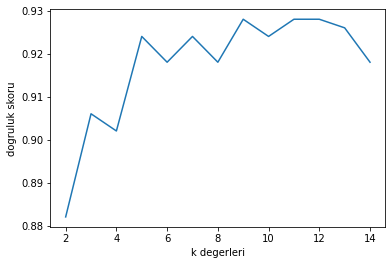

In [51]:
score_list = []
for each in range (2,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(2,15),score_list)
plt.xlabel("k degerleri")
plt.ylabel("dogruluk skoru")
plt.show()

Sınıflandırma raporu.

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Normal       0.93      0.88      0.91       131
      Pahalı       0.93      0.96      0.94       113
        Ucuz       0.90      0.91      0.91       127
    Çok Ucuz       0.95      0.97      0.96       129

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



**Kesinlik (Precision) Positive olarak tahminlediğimiz değerlerin gerçekten kaç adedinin Positive olduğunu göstermektedir.Kesinlik değerinin yüksek olması bizim için model seçiminde önemli bir kriterdir.**
**Duyarlılık (Recall) Positive olarak tahmin etmemiz gereken işlemlerin ne kadarını Positive olarak tahmin ettiğimizi gösteren bir metriktir.Mümkün olduğunca yüksek olması gereklidir.**
**F1 skoru değeri bize Kesinlik (Precision) ve Duyarlılık (Recall) değerlerinin harmonik ortalamasını göstermektedir.**
**Accuracy bir modelin başarısını ölçmek için çok kullanılan ancak tek başına yeterli olmadığı görülen bir metriktir.Accuracy değeri modelde doğru tahmin ettiğimiz alanların toplam veri kümesine oranı ile hesaplanmaktadır.**

GaussianNB modeli ve eğitimi .

In [53]:
nb = GaussianNB()
nb_model = nb.fit(x_train,y_train)

Modelin alabileceği parametreleri görüntüleyelim.

In [54]:
nb_model

GaussianNB()

Model üzerinde yazılabilecek tüm komutlar.

In [55]:
dir(nb_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_X',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_joint_log_likelihood',
 '_more_tags',
 '_partial_fit',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_update_mean_variance',
 '_validate_data',
 'class_count_',
 'class_prior_',
 'classes_',
 'epsilon_',
 'feature_names_in_',
 'fit',
 'get_params',
 'n_features_in_',
 'partial_fit',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'priors',
 'score',
 'set_params',
 'sigma_',
 'theta_',
 'var_',
 'var_smoothing']

In [56]:
y_pred = nb_model.predict(x_test)

In [57]:
y_pred 

array(['Normal', 'Çok Ucuz', 'Pahalı', 'Ucuz', 'Normal', 'Normal',
       'Pahalı', 'Ucuz', 'Normal', 'Ucuz', 'Ucuz', 'Normal', 'Normal',
       'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Ucuz', 'Çok Ucuz',
       'Ucuz', 'Ucuz', 'Ucuz', 'Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Normal',
       'Çok Ucuz', 'Normal', 'Çok Ucuz', 'Çok Ucuz', 'Ucuz', 'Çok Ucuz',
       'Normal', 'Normal', 'Ucuz', 'Normal', 'Pahalı', 'Pahalı',
       'Çok Ucuz', 'Çok Ucuz', 'Ucuz', 'Normal', 'Ucuz', 'Pahalı',
       'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz',
       'Pahalı', 'Pahalı', 'Pahalı', 'Pahalı', 'Normal', 'Çok Ucuz',
       'Çok Ucuz', 'Çok Ucuz', 'Ucuz', 'Normal', 'Pahalı', 'Çok Ucuz',
       'Ucuz', 'Normal', 'Ucuz', 'Pahalı', 'Çok Ucuz', 'Ucuz', 'Çok Ucuz',
       'Ucuz', 'Normal', 'Ucuz', 'Pahalı', 'Çok Ucuz', 'Ucuz', 'Normal',
       'Normal', 'Pahalı', 'Pahalı', 'Ucuz', 'Ucuz', 'Çok Ucuz',
       'Çok Ucuz', 'Pahalı', 'Normal', 'Ucuz', 'Pahalı', 'Ucuz',
       'Çok Ucuz', 'Çok 

In [58]:
y_test 

1860        Ucuz
353     Çok Ucuz
1333      Normal
905         Ucuz
1289      Normal
          ...   
765     Çok Ucuz
1356    Çok Ucuz
408     Çok Ucuz
1614      Pahalı
694       Normal
Name: FiyatAraligi, Length: 500, dtype: object

Doğruluk skoru.

In [59]:
accuracy_score(y_test,y_pred) 

0.764

Karmaşıklık matrisini çizdirelim.

In [60]:
karmasiklik_matrisi=confusion_matrix(y_test,y_pred)
print(karmasiklik_matrisi)

[[ 78  22  31   0]
 [ 23  89   1   0]
 [ 23   0  98   6]
 [  0   0  12 117]]


Sınıflandırma raporu.

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Normal       0.63      0.60      0.61       131
      Pahalı       0.80      0.79      0.79       113
        Ucuz       0.69      0.77      0.73       127
    Çok Ucuz       0.95      0.91      0.93       129

    accuracy                           0.76       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.77      0.76      0.76       500



Kesinlik skorunu görüntüleyelim.

In [62]:
PrecisionScore = precision_score(y_test,y_pred,average='weighted')
PrecisionScore

0.7667240676143392

Yakalama(Recall) ve Hassaslık(Sensitivity) skoru.

In [63]:
RecallScore = recall_score(y_test,y_pred,average='weighted')
RecallScore

0.764

F1 skoru.

In [64]:
F1Score = f1_score(y_test,y_pred,average='weighted')
F1Score

0.764513699197151

DecisionTree modeli.

In [65]:
cart = DecisionTreeClassifier(random_state=42,criterion='entropy')
cart_model = cart.fit(x_train,y_train)

Model ismini yazalım.

In [66]:
cart_model

DecisionTreeClassifier(criterion='entropy', random_state=42)

Bu model için tahminlerde bulunalım.

In [67]:
y_pred = cart_model.predict(x_test)

Doğruluk skorunu görüntüleyelim.

In [68]:
accuracy_score(y_test,y_pred)

0.836

****Knn model için doğruluk skoru 0.92, Gaussian modeli için 0.76, DesicionTree için ise 0.83****

Karmaşıklık matrisini görüntüleyelim.

In [69]:
karmasiklik_matrisi=confusion_matrix(y_test,y_pred)
print(karmasiklik_matrisi)

[[100  11  20   0]
 [ 19  94   0   0]
 [  7   0 110  10]
 [  0   0  15 114]]


Hedef özniteliğin değerlerine göre sınıflandırma raporu.

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Normal       0.79      0.76      0.78       131
      Pahalı       0.90      0.83      0.86       113
        Ucuz       0.76      0.87      0.81       127
    Çok Ucuz       0.92      0.88      0.90       129

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500

